In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spopt
from scipy.stats import norm
import matplotlib.mlab as mlab

f = open("calibration_5.txt","r")
energy = [100, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

part_abs = 0.25
part_sd = 1.75

# read data
data = []
data_ = []
for line in f:
    if line == '\n':
        data.append(data_)
        data_ = []
    else:
        data_.append(float(line[:-2]))

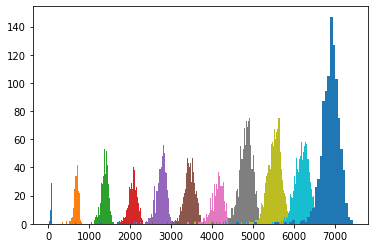

In [4]:
for data_ in data:
    plt.hist(data_, bins=100);

In [5]:
def curve(x, mu, sigma, nevents):
    return nevents / (np.sqrt(2 * np.pi * sigma**2)) * np.exp( - (x - mu)**2 / (2 * sigma**2))

mus = {}
delta_mus = {}

In [6]:
def proc_calibration(number, bins0, p0, cut=[0, -1]):
    start, stop = cut
    en = energy[number]
    n, bins, patches = plt.hist(data[number], bins=bins0);
    bin_centers = bins[:-1] + np.diff(bins) / 2
    bin_centers = bin_centers[start:stop]
    n = n[start:stop]
    
    data_fit_n = []
    data_fit_bin_centers = []
    for i in range(len(n)):
        if n[i] > 0:
            data_fit_n.append(n[i])
            data_fit_bin_centers.append(bin_centers[i])
    
    popt, pcov = spopt.curve_fit(
        curve, data_fit_bin_centers, data_fit_n, p0 = p0,
        bounds = [(0), (10**20)], sigma = np.sqrt(np.array(data_fit_n))
    )
    
    mu, sigma, nevents = popt
    delta_mu, delta_sigma, delta_nevents = np.sqrt(np.diag(pcov))
    
    mus[en] = mu
    delta_mus[en] = delta_mu
    
    print(f"mu = {mu} +- {delta_mu}\nsigma = {sigma} +- {delta_sigma}\nnevents = {nevents} +- {delta_nevents}")
    x = np.linspace(bin_centers[0], bin_centers[-1], 500)
    plt.plot(x, curve(x, mu, sigma, nevents))

mu = 70.62305810997418 +- 0.8114221690461177
sigma = 16.144532082152914 +- 0.7290548910566906
nevents = 853.9938864281025 +- 37.13448636703545


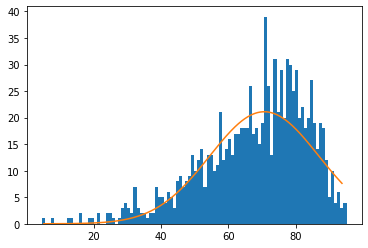

In [8]:
proc_calibration(0, 100, [70, 15, 10000])

mu = 688.7781736537781 +- 2.0017368374300615
sigma = 48.59047908507498 +- 1.4781844491225027
nevents = 4532.220418722645 +- 179.0287932731286


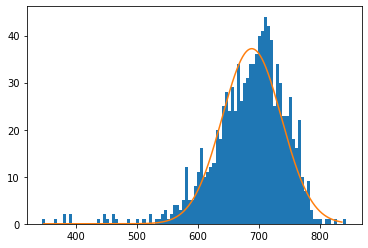

In [10]:
proc_calibration(1, 100, [700, 50, 10000])

mu = 1387.1952263835922 +- 2.920770449818492
sigma = 76.11485223464253 +- 2.268550078067568
nevents = 8772.686052016337 +- 329.39476506285763


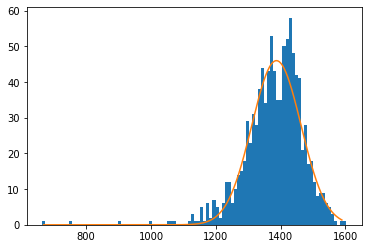

In [12]:
proc_calibration(2, 100, [1400, 60, 10000])

mu = 2080.2481475390396 +- 3.3284210171619053
sigma = 97.18458341664463 +- 2.8103716078383427
nevents = 8076.202609982838 +- 268.6871483385832


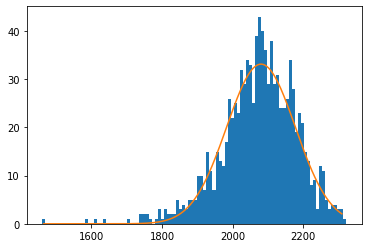

In [14]:
proc_calibration(3, 100, [2100, 100, 10000])

mu = 2774.70828921942 +- 5.033040901193528
sigma = 111.57945874843494 +- 4.028478990769317
nevents = 13339.958402556276 +- 582.0411115524074


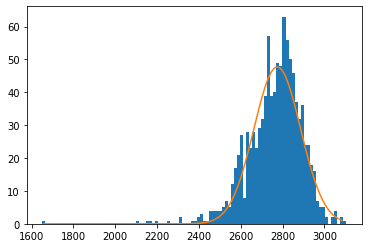

In [16]:
proc_calibration(4, 100, [2800, 100, 10000])

mu = 3463.0513571346 +- 4.36052955202141
sigma = 125.05774359405814 +- 3.192969786867308
nevents = 12411.113443608236 +- 426.08240089043153


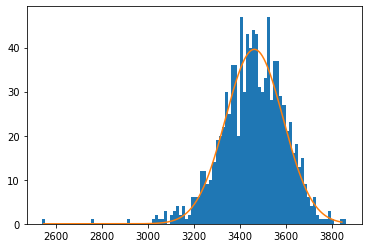

In [18]:
proc_calibration(5, 100, [3400, 120, 10000])

mu = 4158.112716917281 +- 4.443423685132466
sigma = 138.20062075305057 +- 3.6373697509339107
nevents = 10163.375257574315 +- 317.52506483838613


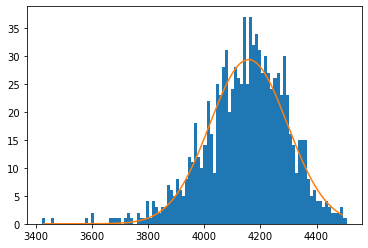

In [20]:
proc_calibration(6, 100, [4200, 140, 10000])

mu = 4847.278657233898 +- 5.663951385406443
sigma = 149.7825373535805 +- 4.3421628085103645
nevents = 25872.169777703184 +- 955.4970622793091


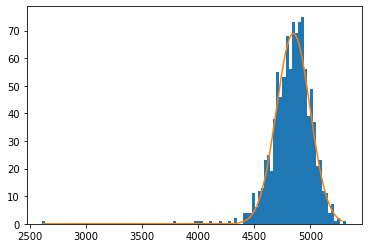

In [22]:
proc_calibration(7, 100, [4800, 150, 10000])

mu = 5534.156670997517 +- 4.901053531173298
sigma = 161.42181692203968 +- 3.5959829328059985
nevents = 26016.080048642594 +- 780.4308663406973


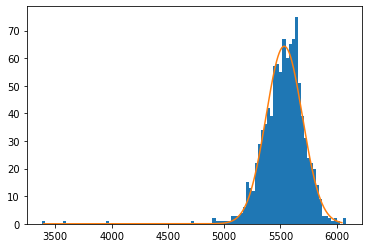

In [24]:
proc_calibration(8, 100, [5500, 170, 10000])

mu = 6216.006973958552 +- 5.176519626624837
sigma = 169.61129216800165 +- 3.8090380030668687
nevents = 23209.42491924838 +- 694.6811359858599


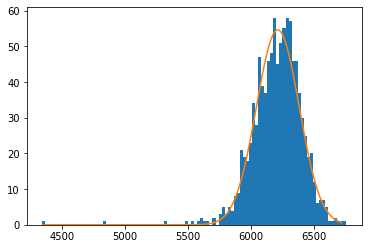

In [26]:
proc_calibration(9, 100, [6200, 170, 10000])

mu = 6911.383912350163 +- 7.257821931299068
sigma = 190.1933411991655 +- 5.694286380211797
nevents = 59940.71704149088 +- 2234.1120642227343


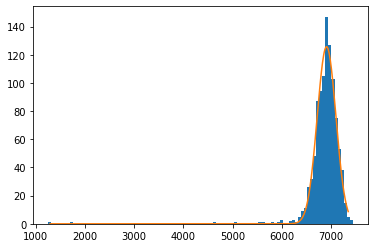

In [27]:
proc_calibration(10, 100, [7000, 180, 10000])

In [28]:
energy_mean= [np.mean(data_) for data_ in data]
energy_std = [np.std(data_) for data_ in data]

a = 0.6906452897229536 +- 0.00040692156222357025
b = -1.3400446861873208 +- 0.6309259779358761


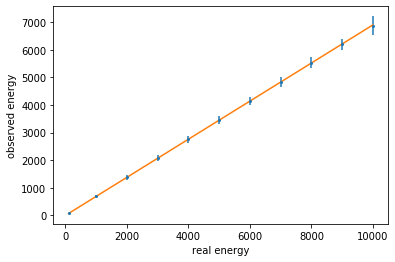

In [29]:
# fit
popt, pcov = spopt.curve_fit(lambda x, a, b: a*x+b, energy, energy_mean, sigma = energy_std)
a, b = popt
delta_a, delta_b = np.sqrt(np.diag(pcov))
plt.errorbar(energy, energy_mean, fmt='o', markersize=2, yerr=energy_std)
plt.xlabel('real energy')
plt.ylabel('observed energy')
x = np.linspace(energy[0], energy[-1], 500)
plt.plot(x, a*x+b)
print(f"a = {a} +- {delta_a}\nb = {b} +- {delta_b}")

In [30]:
def get_real_energy(E_observed):
    return(E_observed - b) / a

In [31]:
f = open("reduction_5.txt","r")
energy_real = [500, 1500, 2500, 3500, 4500, 5500, 6500, 7500, 8500, 9500]


data_reduction = []
data_reduction_ = []
for line in f:
    if line == '\n':
        data_reduction.append(data_reduction_)
        data_reduction_ = []
    else:
        data_reduction_.append(float(line[:-2]))


In [32]:
data_real = [get_real_energy(np.array(data_reduction_)) for data_reduction_ in data_reduction]
sigmas = {}
delta_sigmas = {}

In [33]:
def proc(number, bins0, p0, cut=[0, -1]):
    start, stop = cut
    en = energy_real[number]
    n, bins, patches = plt.hist(data_real[number], bins=bins0);
    bin_centers = bins[:-1] + np.diff(bins) / 2
    bin_centers = bin_centers[start:stop]
    n = n[start:stop]
    
    data_fit_n = []
    data_fit_bin_centers = []
    for i in range(len(n)):
        if n[i] > 0:
            data_fit_n.append(n[i])
            data_fit_bin_centers.append(bin_centers[i])
    
    popt, pcov = spopt.curve_fit(
        curve, data_fit_bin_centers, data_fit_n, p0 = p0,
        bounds = [(0), (10**20)], sigma = np.sqrt(np.array(data_fit_n))
    )
    
    mu, sigma, nevents = popt
    delta_mu, delta_sigma, delta_nevents = np.sqrt(np.diag(pcov))
    
    sigmas[en] = sigma
    delta_sigmas[en] = delta_sigma
    
    print(f"mu = {mu} +- {delta_mu}\nsigma = {sigma} +- {delta_sigma}\nnevents = {nevents} +- {delta_nevents}")
    x = np.linspace(bin_centers[0], bin_centers[-1], 500)
    plt.plot(x, curve(x, mu, sigma, nevents))
    
    print(f"mean = {np.mean(data_real[number])}\nstd = {np.std(data_real[number])}\n\n")


mu = 504.27259403921136 +- 2.7757241975705806
sigma = 50.69917358096252 +- 2.1607347528830916
nevents = 10181.580128118716 +- 532.510220342468
mean = 496.48383308852556
std = 63.50562780180498




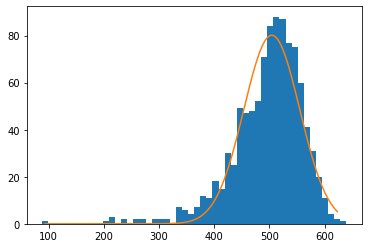

In [34]:
proc(0, 50, [500, 150, 10000])

mu = 1511.4856482624132 +- 5.46816964522121
sigma = 94.56908946378833 +- 4.531482487469772
nevents = 20080.380772248158 +- 1117.4623806669226
mean = 1498.2023457819555
std = 109.24679143647467




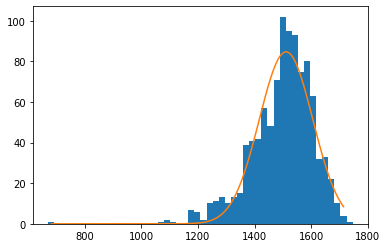

In [35]:
proc(1, 50, [1500, 200, 100000])

mu = 2510.616492026666 +- 6.342084038502541
sigma = 120.31485561527668 +- 4.659905356326273
nevents = 38044.139144748115 +- 1947.2841356925117
mean = 2495.780401438247
std = 158.3699391879838




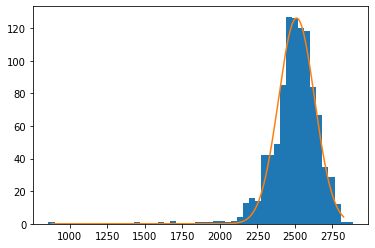

In [36]:
proc(2, 50, [2500, 300, 100000])

mu = 3516.1025691415325 +- 5.9152835611990255
sigma = 155.1130626950305 +- 4.703831124431639
nevents = 34822.45995335885 +- 1299.5663984450152
mean = 3501.2781622911
std = 180.20744589009547




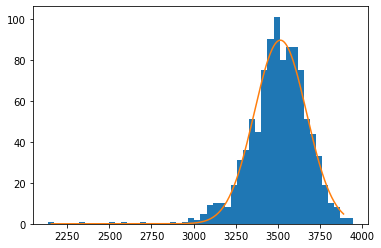

In [37]:
proc(3, 50, [3500, 400, 100000])

mu = 4507.623233257166 +- 6.478830109508956
sigma = 163.45353323519922 +- 5.000030262721354
nevents = 35120.81968406128 +- 1354.2169262081827
mean = 4497.3182733674375
std = 193.09077618052274




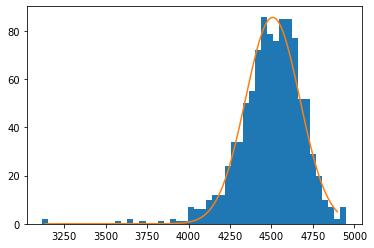

In [38]:
proc(4, 50, [4500, 500, 100000])

mu = 5516.582396757013 +- 9.510082358022887
sigma = 191.80062229412977 +- 7.642994068617703
nevents = 71878.37281000674 +- 3458.6995035001505
mean = 5492.897118487516
std = 250.98589842057908




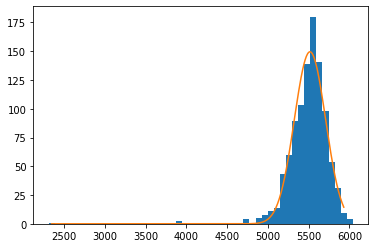

In [39]:
proc(5, 50, [5500, 500, 100000])

mu = 6522.69895209578 +- 8.642087176107582
sigma = 215.08462959826474 +- 7.041861068461809
nevents = 61960.4037927474 +- 2397.9206118648876
mean = 6503.210850605929
std = 242.26594857343764




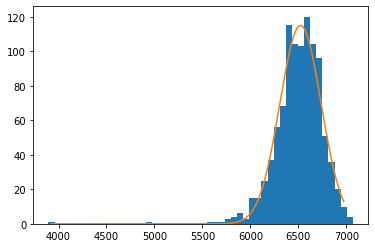

In [40]:
proc(6, 50, [6500, 500, 100000])

mu = 7503.861485327144 +- 8.305207374810731
sigma = 231.7229050870714 +- 6.642135189511025
nevents = 60141.93702379482 +- 2102.049809431256
mean = 7479.845563818224
std = 282.863845817525




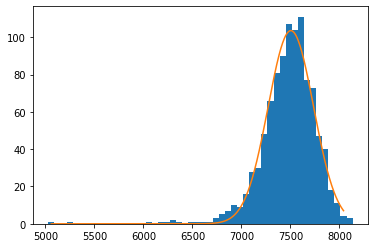

In [41]:
proc(7, 50, [7500, 600, 100000])

mu = 8527.537396403008 +- 8.465805010288
sigma = 244.4631065709293 +- 7.020151189898745
nevents = 53641.21484242147 +- 1781.3897941584783
mean = 8507.355595609895
std = 272.6129181885692




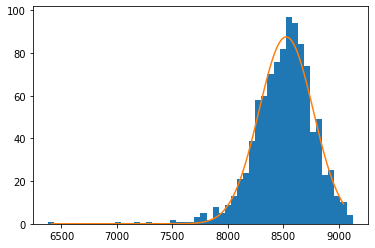

In [42]:
proc(8, 50, [8500, 500, 1000000])

mu = 9510.3945153549 +- 9.201191781185171
sigma = 253.21273093007116 +- 7.112905557998189
nevents = 49990.94117403686 +- 1786.3626556087681
mean = 9496.929695976465
std = 278.5884173925054




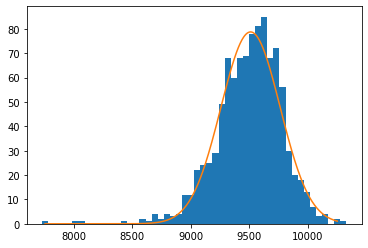

In [43]:
proc(9, 50, [9500, 700, 1000000])

In [44]:
delta_E_to_E = [sigmas[energy_real[i]]/energy_real[i] for i in range(len(sigmas))]

a = 0.004669516614516186 +- 0.0011583273537633418
b = 2.219684178292996 +- 0.0862974791845354


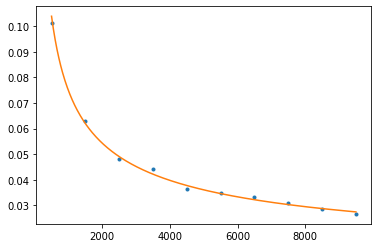

In [45]:
def curve_energy(x, a, b):
    return a + b / np.sqrt(x)

popt, pcov = spopt.curve_fit(curve_energy, energy_real, delta_E_to_E, sigma = [delta_sigmas[energy_real[i]]/energy_real[i] for i in range(len(sigmas))])
a, b = popt
delta_a, delta_b = np.sqrt(np.diag(pcov))
print(f"a = {a} +- {delta_a}\nb = {b} +- {delta_b}")
plt.plot(energy_real, delta_E_to_E, 'o', markersize=3)
x = np.linspace(energy_real[0], energy_real[-1], 500)
plt.plot(x, curve_energy(x, a, b))

In [46]:
file = open('results.txt', 'a+')
file.write(f"{part_abs} {part_sd} {a} {delta_a} {b} {delta_b}\n")
file.close()